# Spectral Construction

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## 

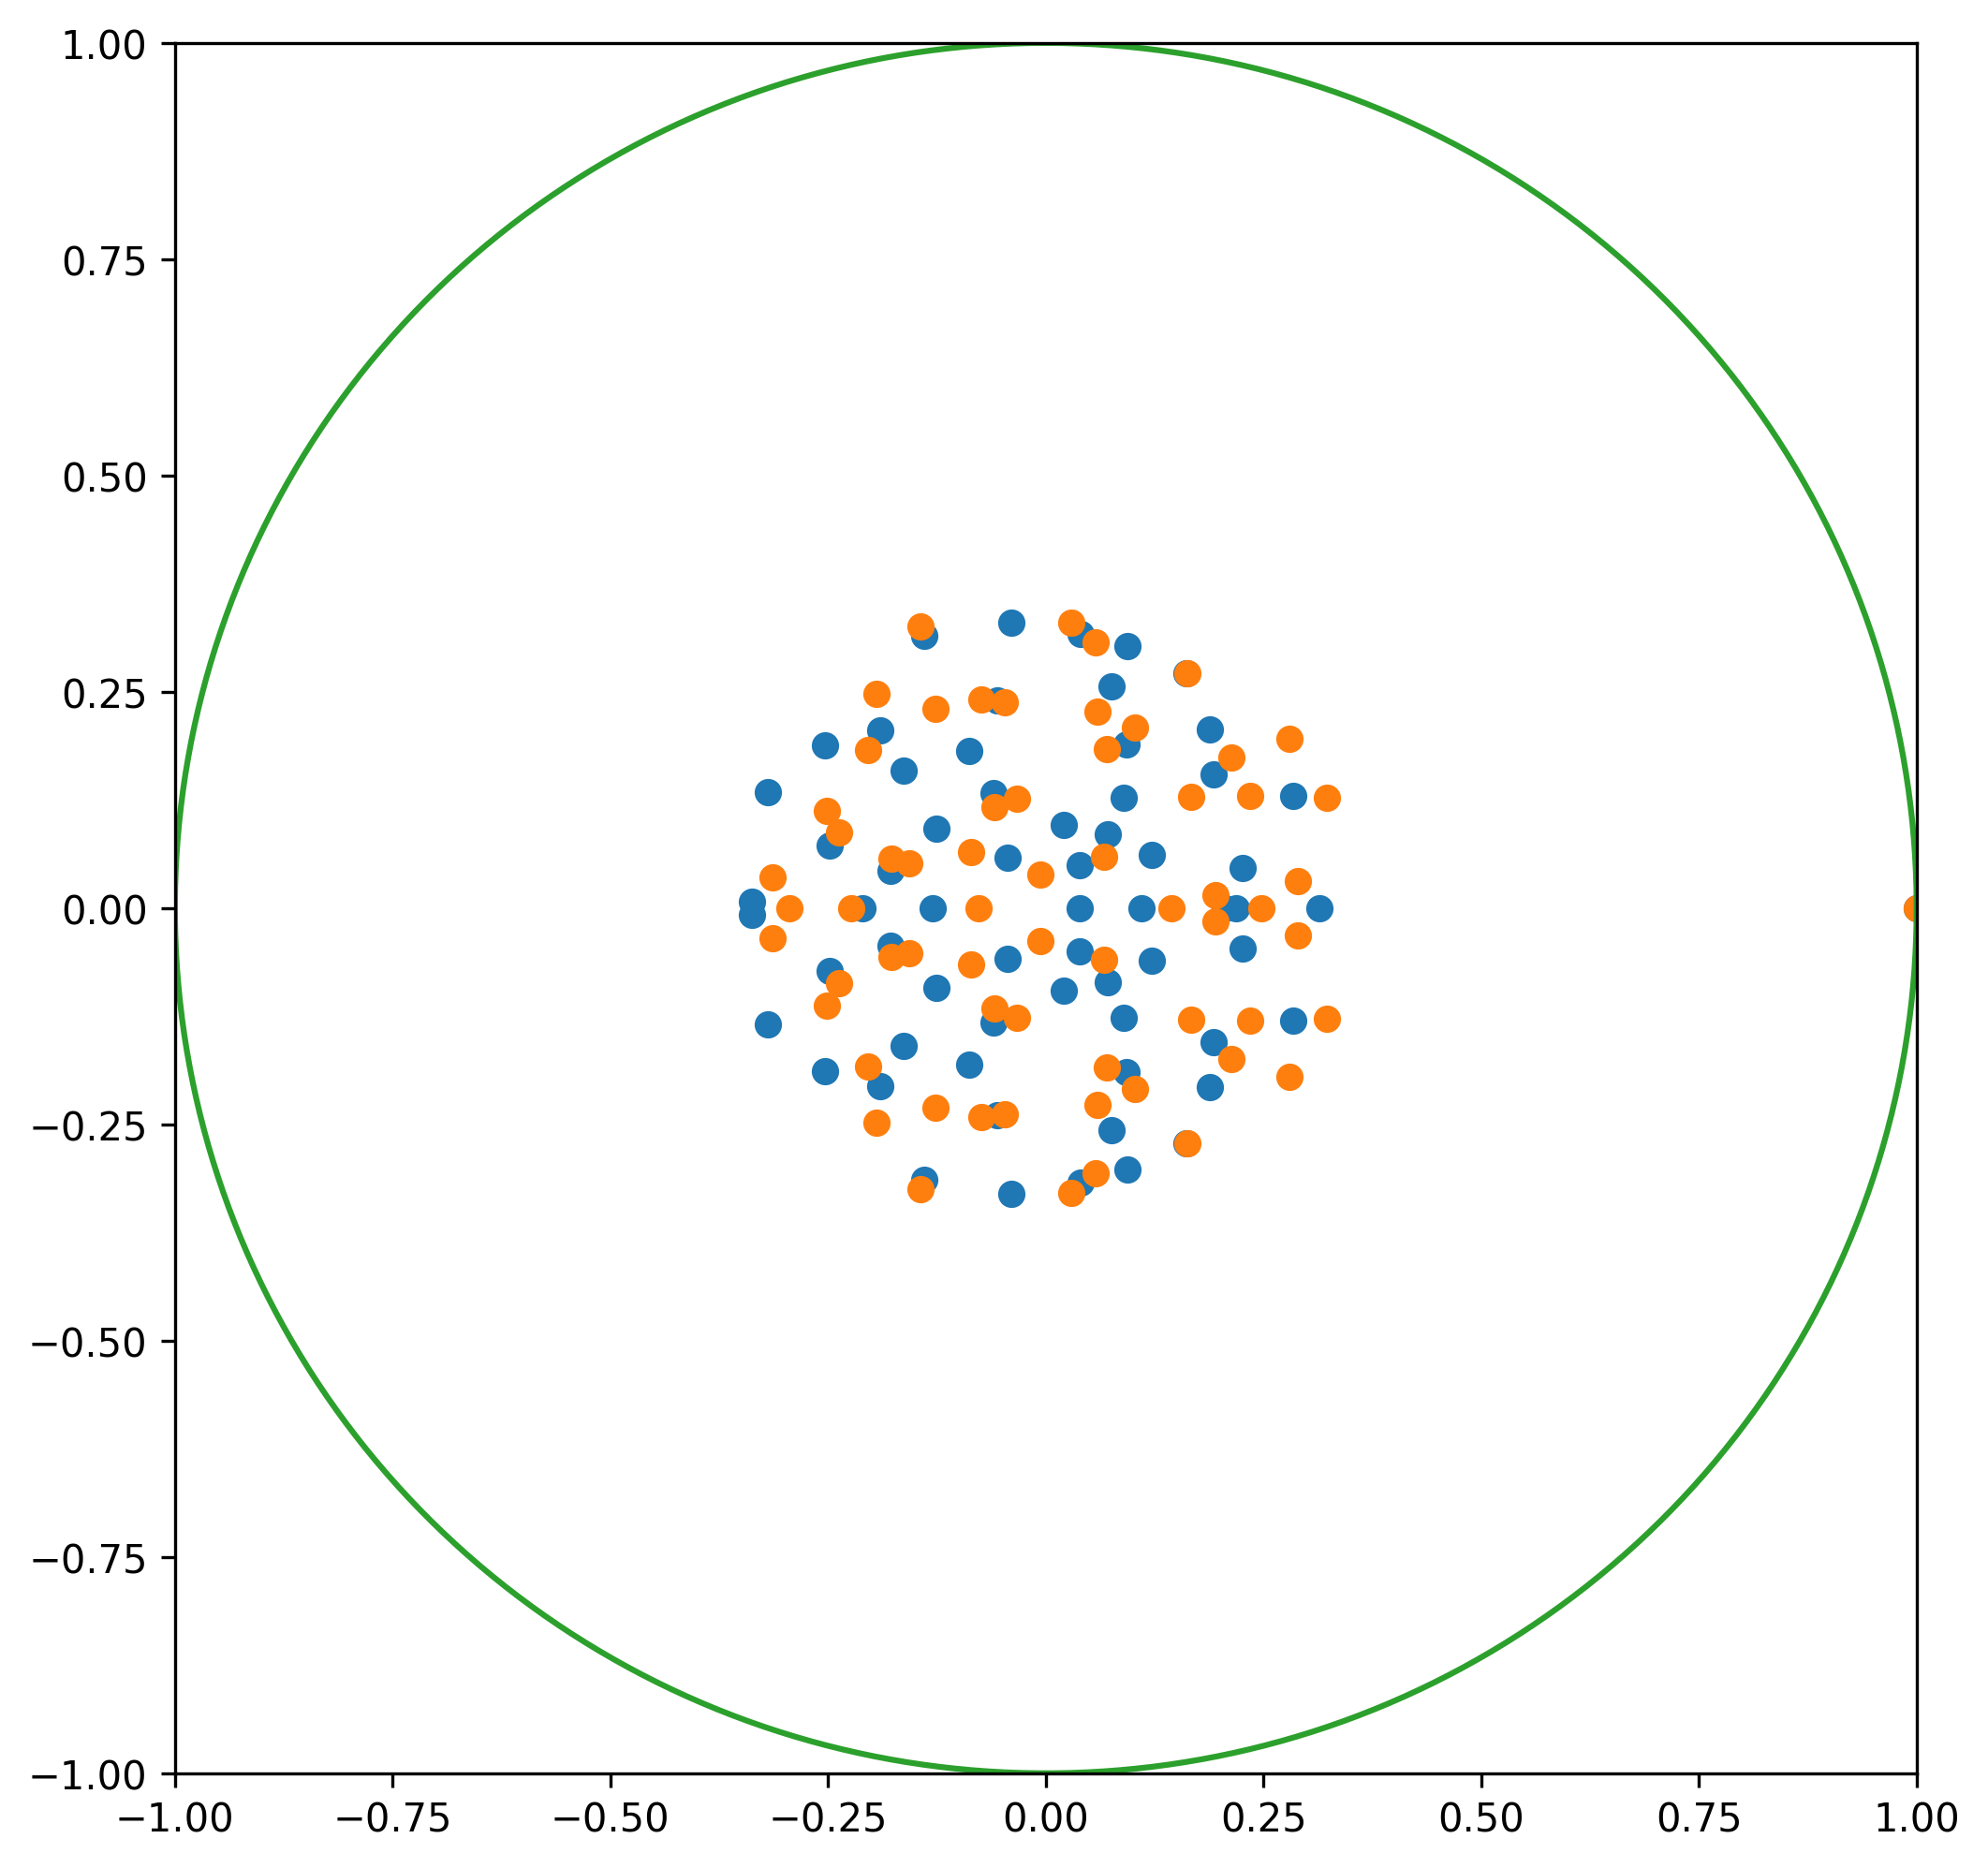

In [25]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

kraus_target = KrausMap(d = d, 
                        rank = d,
                        )

kraus_model = KrausMap(d = d, 
                       rank = d,
                      )

choi_target1 = maps_to_choi([kraus_target])
choi_model1 = maps_to_choi([kraus_model])

spectrum_target = choi_spectrum(choi_target1)
spectrum_model = choi_spectrum(choi_model1)

#spectrum_target = [spectrum_target[0].numpy(), spectrum_target[1].numpy()]
#spectrum_target = [3*spectrum_target[0], 3*spectrum_target[1]]
#spectrum_target[0][-1] = 1 
#spectrum_target[1][-1] = 0

#spectrum_target = [tf.cast(spectrum_target[0], dtype = precision), tf.cast(spectrum_target[1], dtype = precision)]

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*spectrum_target, "o")
plt.plot(*spectrum_model, "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [26]:
steady = choi_steady_state(choi_model1)
steady = steady/tf.linalg.trace(steady)

print(tf.linalg.trace(steady))
print(tf.linalg.trace(steady@steady))

tf.Tensor((0.9999999999999999-3.697785493223493e-32j), shape=(), dtype=complex128)
tf.Tensor((0.13610393452587272+3.4592825565865626e-18j), shape=(), dtype=complex128)


In [27]:
model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = SpectrumDistance(sigma=0.1),
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [28]:
model.train(inputs = [spectrum_target],
            targets = [],
            num_iter = 500,
            N = 1,
            use_batch = False,
            )

  0%|          | 0/500 [00:00<?, ?it/s]

Step:0, train: 2642.82351, val: 0.00000
Step:1, train: 2532.44668, val: 0.00000
Step:2, train: 2478.24414, val: 0.00000
Step:3, train: 2417.98322, val: 0.00000
Step:4, train: 2356.81461, val: 0.00000
Step:5, train: 2302.19366, val: 0.00000
Step:6, train: 2260.30421, val: 0.00000
Step:7, train: 2220.33756, val: 0.00000
Step:8, train: 2181.88768, val: 0.00000
Step:9, train: 2145.45623, val: 0.00000
Step:10, train: 2110.83829, val: 0.00000
Step:11, train: 2077.39296, val: 0.00000
Step:12, train: 2045.81709, val: 0.00000
Step:13, train: 2016.13328, val: 0.00000
Step:14, train: 1988.26041, val: 0.00000
Step:15, train: 1961.60814, val: 0.00000
Step:16, train: 1936.32189, val: 0.00000
Step:17, train: 1912.15930, val: 0.00000
Step:18, train: 1889.03484, val: 0.00000
Step:19, train: 1866.84082, val: 0.00000
Step:20, train: 1845.53540, val: 0.00000
Step:21, train: 1825.04400, val: 0.00000
Step:22, train: 1805.31423, val: 0.00000
Step:23, train: 1786.25344, val: 0.00000
Step:24, train: 1767.80993

Step:201, train: 714.55494, val: 0.00000
Step:202, train: 713.63442, val: 0.00000
Step:203, train: 712.79439, val: 0.00000
Step:204, train: 711.95948, val: 0.00000
Step:205, train: 711.44238, val: 0.00000
Step:206, train: 710.45166, val: 0.00000
Step:207, train: 709.61027, val: 0.00000
Step:208, train: 708.23167, val: 0.00000
Step:209, train: 707.14289, val: 0.00000
Step:210, train: 706.42524, val: 0.00000
Step:211, train: 706.24830, val: 0.00000
Step:212, train: 707.64955, val: 0.00000
Step:213, train: 705.16721, val: 0.00000
Step:214, train: 703.29574, val: 0.00000
Step:215, train: 703.18987, val: 0.00000
Step:216, train: 702.07103, val: 0.00000
Step:217, train: 700.70556, val: 0.00000
Step:218, train: 700.54483, val: 0.00000
Step:219, train: 700.26194, val: 0.00000
Step:220, train: 698.81359, val: 0.00000
Step:221, train: 697.73648, val: 0.00000
Step:222, train: 697.43984, val: 0.00000
Step:223, train: 696.59806, val: 0.00000
Step:224, train: 695.62110, val: 0.00000
Step:225, train:

Step:401, train: 642.25012, val: 0.00000
Step:402, train: 642.72597, val: 0.00000
Step:403, train: 642.70566, val: 0.00000
Step:404, train: 641.84262, val: 0.00000
Step:405, train: 642.38529, val: 0.00000
Step:406, train: 641.99570, val: 0.00000
Step:407, train: 641.86279, val: 0.00000
Step:408, train: 641.81787, val: 0.00000
Step:409, train: 641.29483, val: 0.00000
Step:410, train: 641.58225, val: 0.00000
Step:411, train: 641.15015, val: 0.00000
Step:412, train: 641.02903, val: 0.00000
Step:413, train: 641.10952, val: 0.00000
Step:414, train: 640.73749, val: 0.00000
Step:415, train: 640.83165, val: 0.00000
Step:416, train: 640.63393, val: 0.00000
Step:417, train: 640.49661, val: 0.00000
Step:418, train: 640.49310, val: 0.00000
Step:419, train: 640.21121, val: 0.00000
Step:420, train: 640.21167, val: 0.00000
Step:421, train: 640.10159, val: 0.00000
Step:422, train: 639.90048, val: 0.00000
Step:423, train: 639.87554, val: 0.00000
Step:424, train: 639.72239, val: 0.00000
Step:425, train:

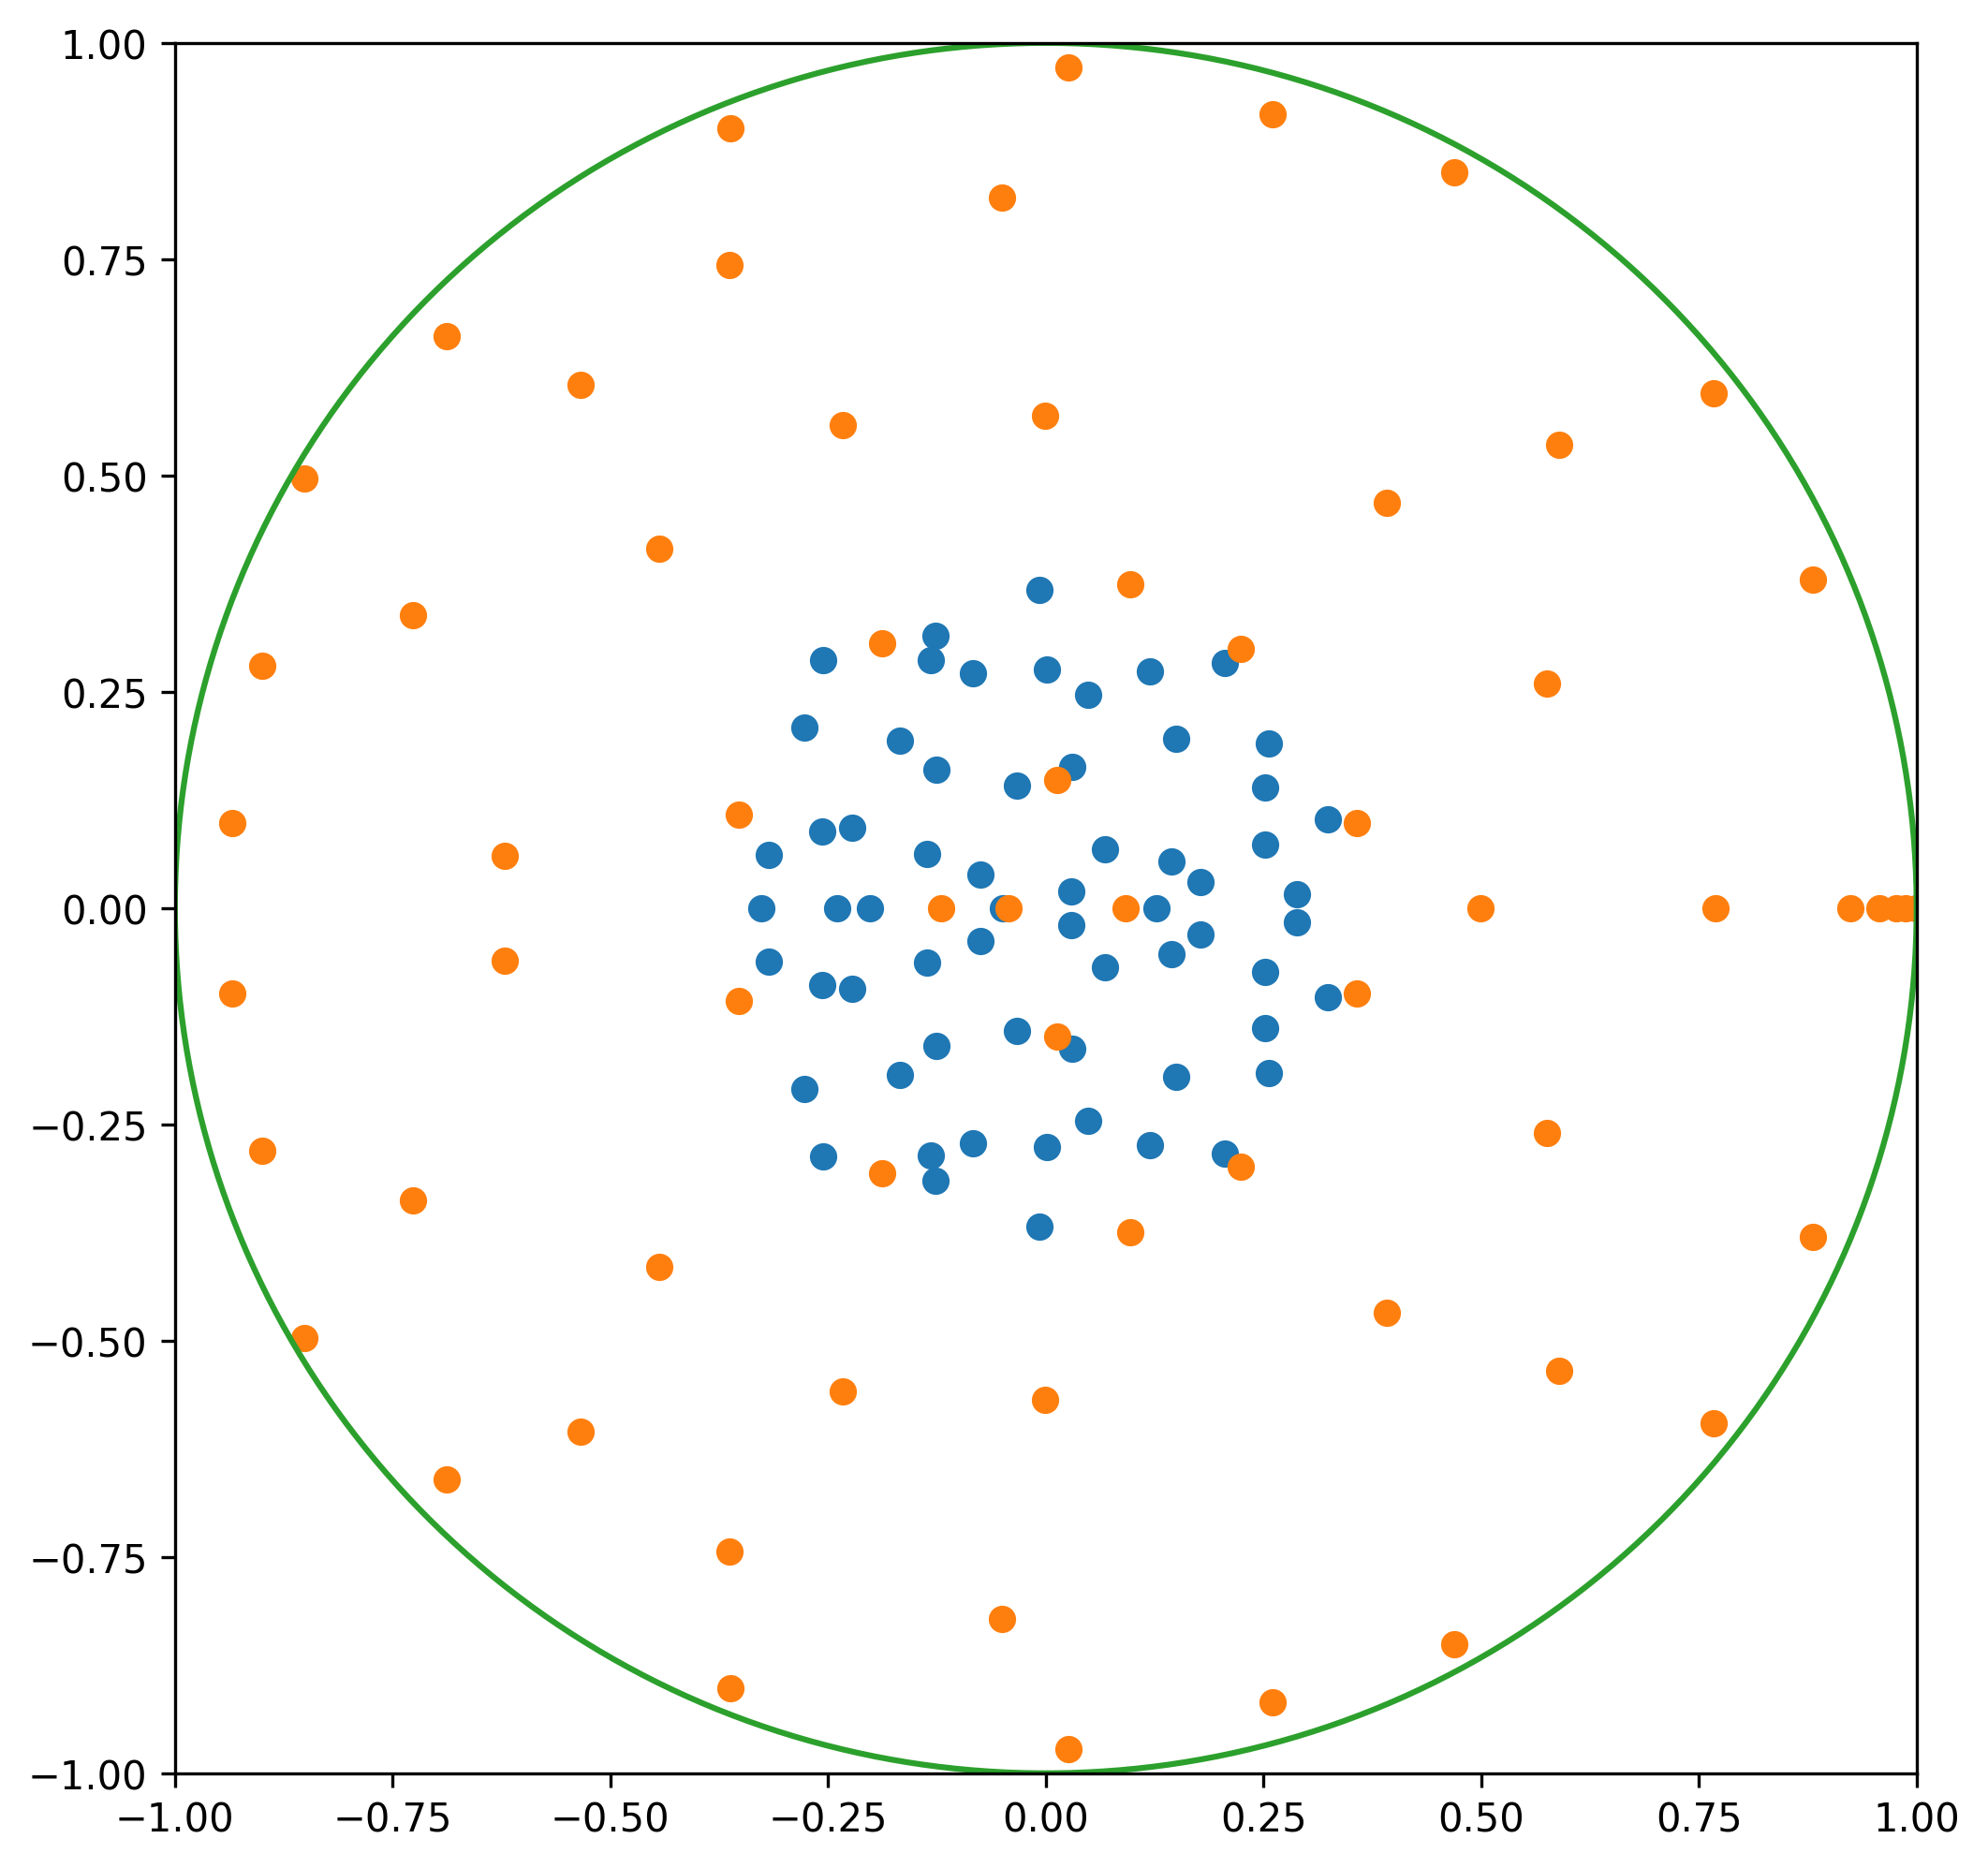

In [23]:
choi_model1 = maps_to_choi([kraus_model])
spectrum_model = choi_spectrum(choi_model1)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*spectrum_target, "o")
plt.plot(*spectrum_model, "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [10]:
steady = choi_steady_state(choi_model1)
steady = steady/tf.linalg.trace(steady)

print(tf.linalg.trace(steady))
print(tf.linalg.trace(steady@steady))

tf.Tensor((1.0000000000000002+2.7610131682735413e-30j), shape=(), dtype=complex128)
tf.Tensor((0.2472460580119178-8.190198736227061e-16j), shape=(), dtype=complex128)


In [15]:
model.zero_optimizer()
model.loss.sigma=0.025

In [16]:
model.train(inputs = [spectrum_target],
            targets = [],
            num_iter = 500,
            N = 1,
            use_batch = False,
            )

  0%|          | 0/500 [00:00<?, ?it/s]

Step:0, train: 2743.11993, val: 0.00000
Step:1, train: 2722.62564, val: 0.00000
Step:2, train: 2703.55931, val: 0.00000
Step:3, train: 2686.12525, val: 0.00000
Step:4, train: 2670.54702, val: 0.00000
Step:5, train: 2656.96430, val: 0.00000
Step:6, train: 2645.31603, val: 0.00000
Step:7, train: 2635.21313, val: 0.00000
Step:8, train: 2626.17026, val: 0.00000
Step:9, train: 2617.60660, val: 0.00000
Step:10, train: 2609.21539, val: 0.00000
Step:11, train: 2600.89763, val: 0.00000
Step:12, train: 2592.81071, val: 0.00000
Step:13, train: 2585.25375, val: 0.00000
Step:14, train: 2578.62666, val: 0.00000
Step:15, train: 2573.40206, val: 0.00000
Step:16, train: 2569.89965, val: 0.00000
Step:17, train: 2568.00323, val: 0.00000
Step:18, train: 2567.05407, val: 0.00000
Step:19, train: 2566.18374, val: 0.00000
Step:20, train: 2565.16099, val: 0.00000
Step:21, train: 2564.20934, val: 0.00000
Step:22, train: 2563.53523, val: 0.00000
Step:23, train: 2563.12560, val: 0.00000
Step:24, train: 2562.84747

KeyboardInterrupt: 

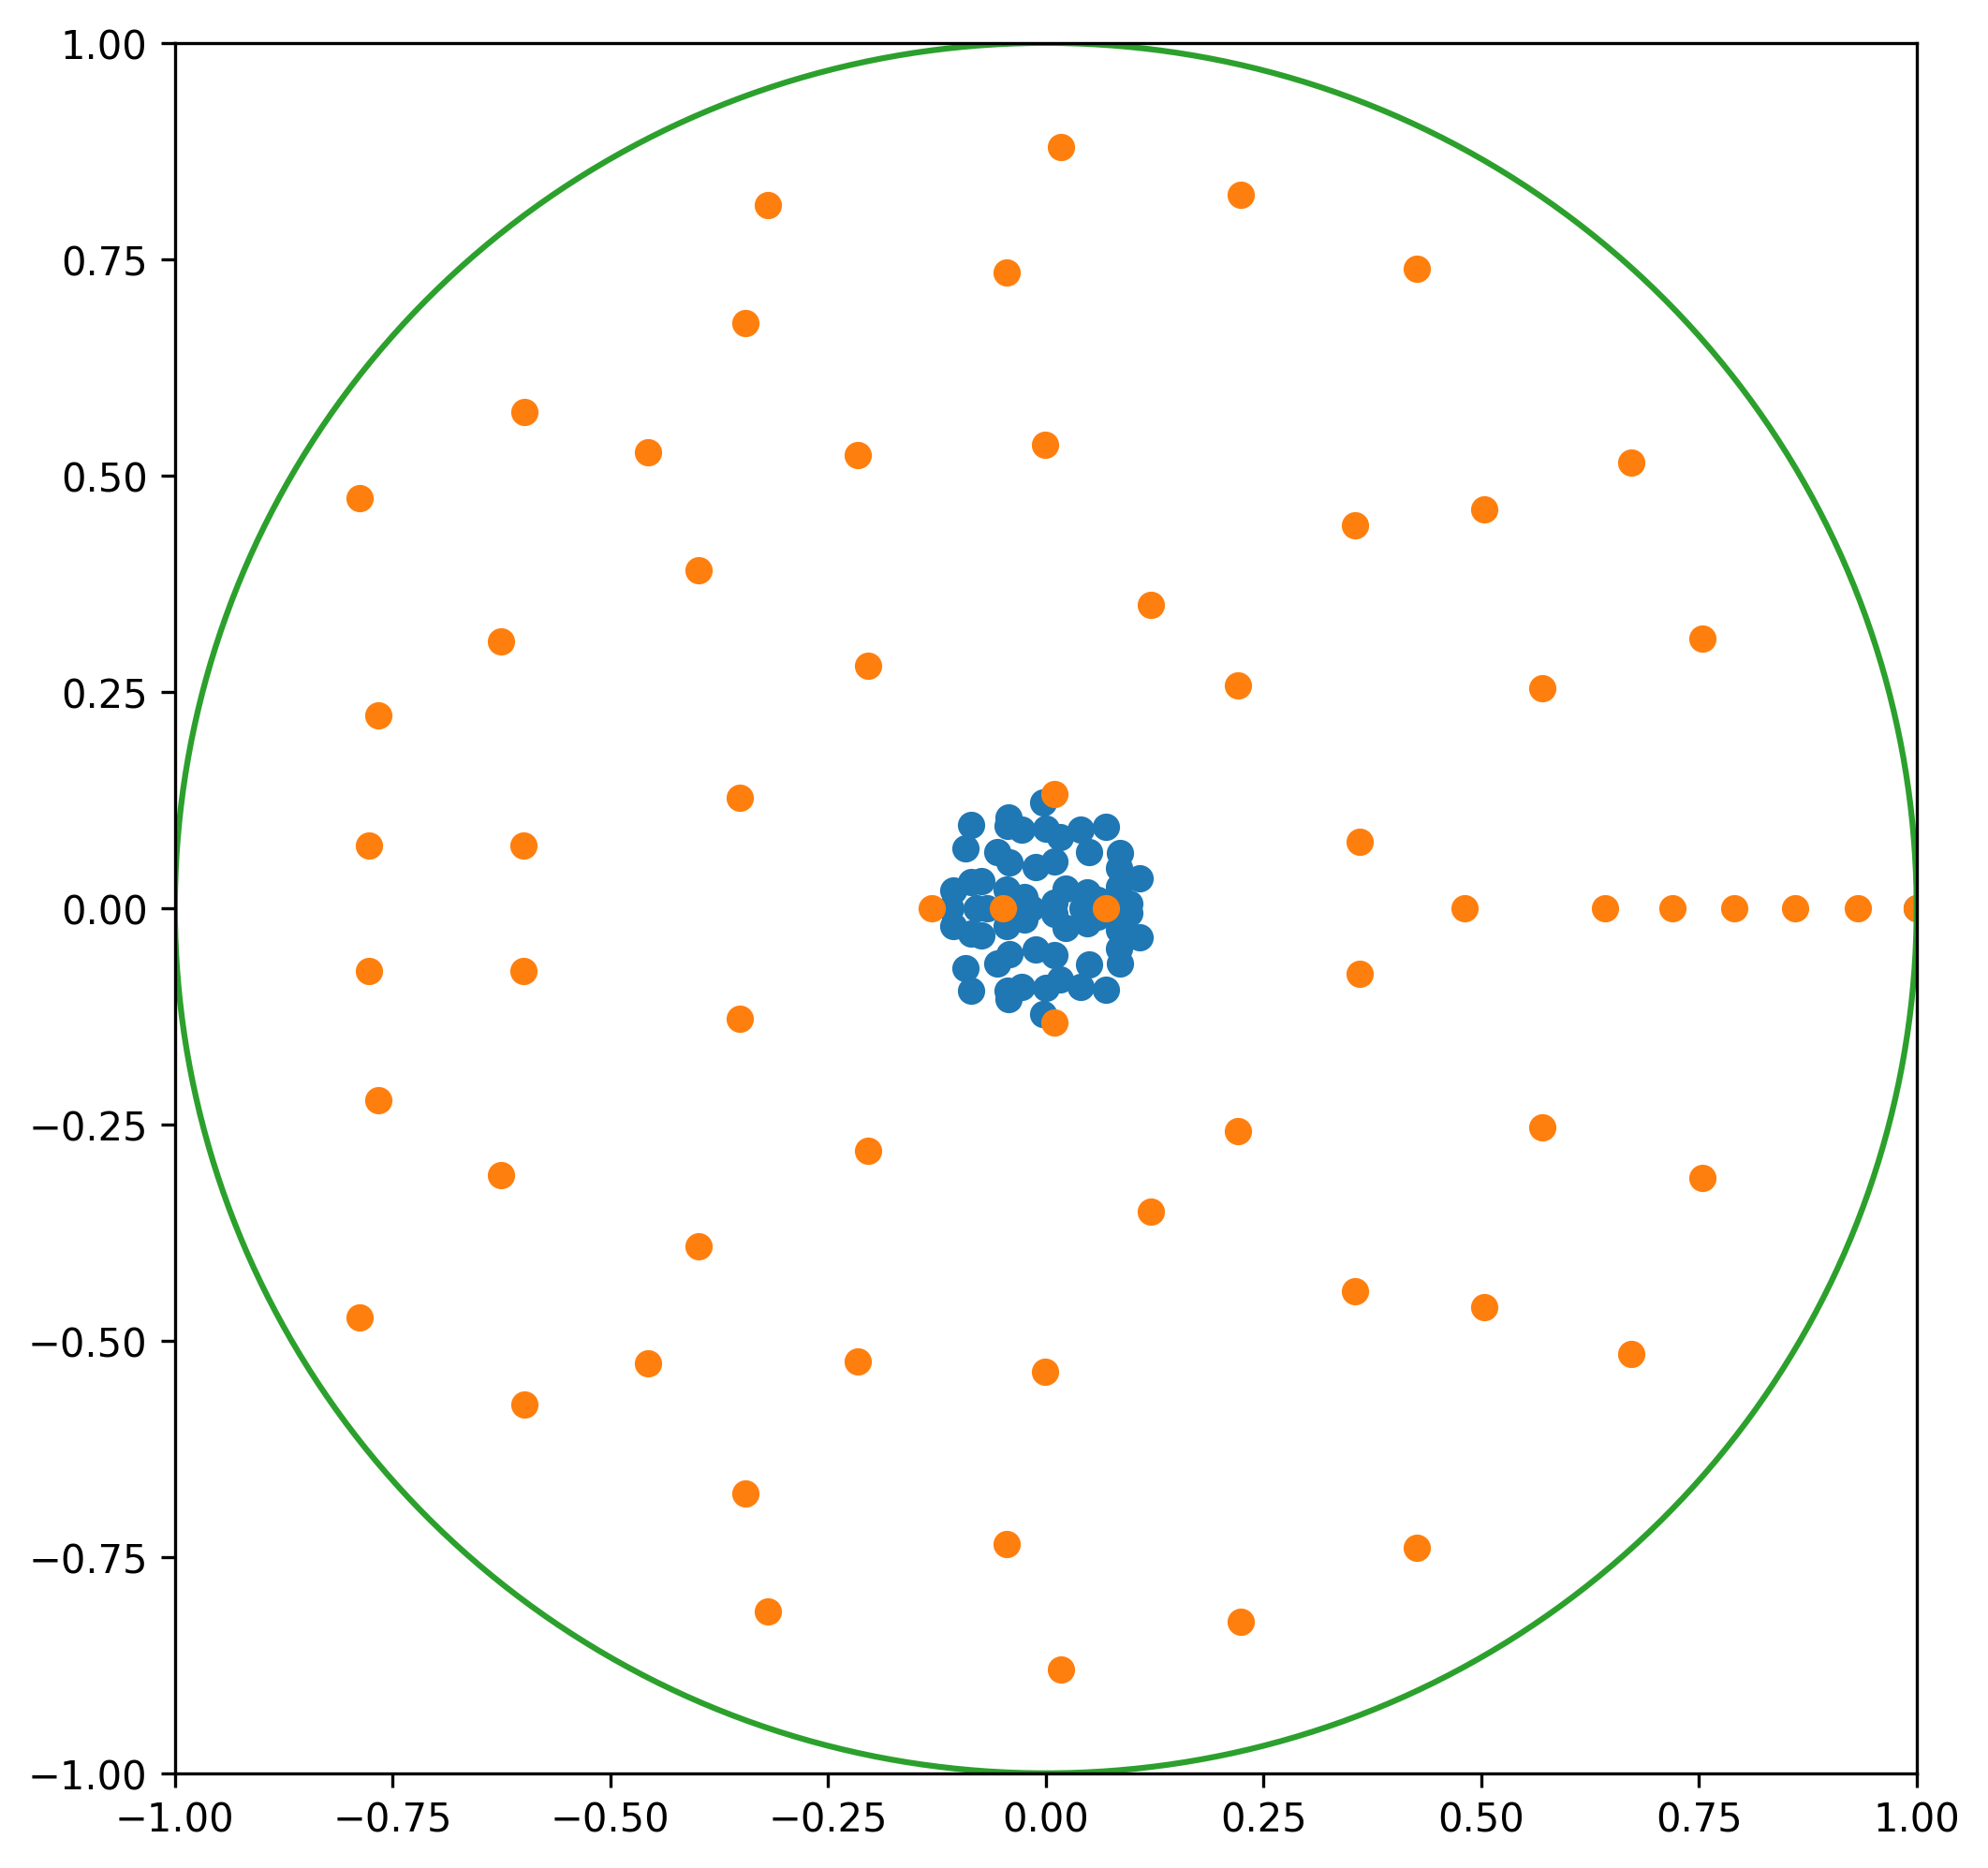

In [18]:
choi_model1 = maps_to_choi([kraus_model])
spectrum_model = choi_spectrum(choi_model1)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*spectrum_target, "o")
plt.plot(*spectrum_model, "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()